# Binary classification with Keras neural network

This notebook can be used if you want to train the model yourself!

Original notebook: https://www.kaggle.com/kosovanolexandr/keras-nn-x-ray-predict-pneumonia-86-54

Dataset: https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

### Imports

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras import backend as K

import os
import numpy as np
import pandas as np

import matplotlib.pyplot as plt
%matplotlib inline

### Verify our directories structure

In [2]:
print(os.listdir("./data/chest_xray"))

print(os.listdir("./data/chest_xray/test"))

print(os.listdir("./data/chest_xray/train/"))

print(os.listdir("./data/chest_xray/val/"))

['.ipynb_checkpoints', 'test', 'demo_anonymized', 'val', 'train', 'demo_base']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


### Check an image in the "NORMAL" training set

NORMAL


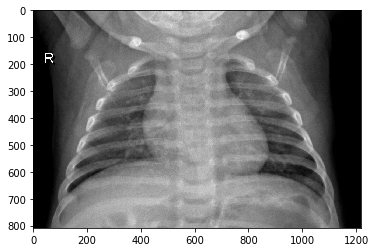

In [3]:
img_name = 'NORMAL2-IM-0588-0001.jpeg'
img_normal = load_img('./data/chest_xray/train/NORMAL/' + img_name)

print('NORMAL')
plt.imshow(img_normal)
plt.show()

### Check an image in the PNEUMONIA training set

PNEUMONIA


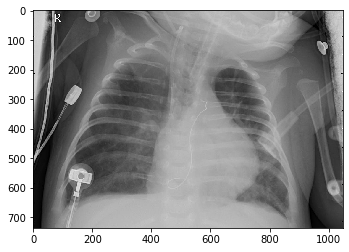

In [4]:
img_name = 'person63_bacteria_306.jpeg'
img_pneumonia = load_img('./data/chest_xray/train/PNEUMONIA/' + img_name)

print('PNEUMONIA')
plt.imshow(img_pneumonia)
plt.show()

### Initialize variables

In [5]:
# dimensions of our images.
img_width, img_height = 150, 150

In [6]:
train_data_dir = './data/chest_xray/train'
validation_data_dir = './data/chest_xray/val'
test_data_dir = './data/chest_xray/test'

nb_train_samples = 5217
nb_validation_samples = 17
epochs = 20
batch_size = 16

In [7]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

### Create Sequential model

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

### Check information about the model

In [9]:
model.layers

In [10]:
model.input

<tf.Tensor 'conv2d_input:0' shape=(None, 150, 150, 3) dtype=float32>

In [11]:
model.output

<tf.Tensor 'activation_4/Identity:0' shape=(None, 1) dtype=float32>

### Compile the model

In [12]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Upload images from the different sets

In [13]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [14]:
# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [15]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [16]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [17]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


### Fit the model

In [18]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/20
326/326 [==============================] - 50s 155ms/step - loss: 0.4622 - accuracy: 0.7997 - val_loss: 0.4385 - val_accuracy: 0.8750
Epoch 2/20
326/326 [==============================] - 50s 154ms/step - loss: 0.3015 - accuracy: 0.8758 - val_loss: 1.1752 - val_accuracy: 0.6250
Epoch 3/20
326/326 [==============================] - 50s 153ms/step - loss: 0.2595 - accuracy: 0.8959 - val_loss: 0.6799 - val_accuracy: 0.7500
Epoch 4/20
326/326 [==============================] - 50s 154ms/step - loss: 0.2279 - accuracy: 0.9158 - val_loss: 1.0023 - val_accuracy: 0.6250
Epoch 5/20
326/326 [==============================] - 50s 154ms/step - loss: 0.2205 - accuracy: 0.9222 - val_loss: 0.8024 - val_accuracy: 0.6875
Epoch 6/20
326/326 [==============================] - 50s 154ms/step - loss: 0.2154 - accuracy: 0.9245 - val_loss: 0.3813 - val_accuracy: 0.8125
Epoch 7/20
326/326 [==============================] - 50s 154ms/step - loss: 0.2027 - accuracy: 0.9266 - val_loss: 1.1369 - val_ac

### Save the model (weights + complete model)

In [19]:
model.save_weights('first_try.h5')

In [20]:
model.save('pneumonia_model.h5')

### Evaluate the model

In [21]:
# evaluate the model
scores = model.evaluate_generator(test_generator)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


accuracy: 82.05%
